In [235]:
import requests # 웹 페이지 소스를 얻기 위한 패키지
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점
from datetime import datetime                              
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지(사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import numpy as np
import pickle
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from konlpy.tag import Twitter
from collections import Counter

import numpy as np
import nltk
from nltk.corpus import stopwords



In [2]:
plt.style.use('ggplot')

In [4]:
api_key = 'RGAPI-6db437cb-0544-4676-aff9-7e92664b273a'

In [5]:
sohwan_name = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/babytonight"+ '?api_key=' + api_key

In [6]:
r = requests.get(sohwan_name)

In [7]:
r

<Response [200]>

In [9]:
r.json()['id']

'0oQ4VFVifP1HtOWDxDCzaWLdGd9l9AxbaXpIC-GbrY3hjw'

In [19]:
sohwan_tier = "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/" + r.json()['id'] +'?api_key=' + api_key

In [20]:
r2 = requests.get(sohwan_tier)

In [21]:
r2

<Response [200]>

In [22]:
r2.json()

[{'leagueId': '843ae9d0-727e-11e9-93a8-c81f66e41892',
  'queueType': 'RANKED_SOLO_5x5',
  'tier': 'GOLD',
  'rank': 'III',
  'summonerId': '0oQ4VFVifP1HtOWDxDCzaWLdGd9l9AxbaXpIC-GbrY3hjw',
  'summonerName': 'babytonight',
  'leaguePoints': 45,
  'wins': 167,
  'losses': 168,
  'veteran': False,
  'inactive': False,
  'freshBlood': False,
  'hotStreak': False}]

In [23]:
sohwan_grandmaster = 'https://kr.api.riotgames.com/lol/league/v4/grandmasterleagues/by-queue/RANKED_SOLO_5x5?api_key=' + api_key

In [24]:
r3 = requests.get(sohwan_grandmaster)

In [25]:
r3

<Response [200]>

In [73]:
grand_df = pd.DataFrame(r3.json())

In [74]:
grand_df.head()

,tier,leagueId,queue,name,entries
0,GRANDMASTER,b82a4a63-6fe0-34c1-96c5-bd9a7b8b8201,RANKED_SOLO_5x5,Syndra's Masterminds,{'summonerId': 'fQrh0QFG5LxuZs6jYwVegs6TiYHx_j...
1,GRANDMASTER,b82a4a63-6fe0-34c1-96c5-bd9a7b8b8201,RANKED_SOLO_5x5,Syndra's Masterminds,{'summonerId': 'eiVknWDFk_92S2OYJA7d1cMr-FVHWT...
2,GRANDMASTER,b82a4a63-6fe0-34c1-96c5-bd9a7b8b8201,RANKED_SOLO_5x5,Syndra's Masterminds,{'summonerId': 'xlZhfdH3qsTe1L-_uJYhoq7VRZTmaD...
3,GRANDMASTER,b82a4a63-6fe0-34c1-96c5-bd9a7b8b8201,RANKED_SOLO_5x5,Syndra's Masterminds,{'summonerId': 'RtrJBpyO4LNj6SLFkSXjeSPBaZiuAS...
4,GRANDMASTER,b82a4a63-6fe0-34c1-96c5-bd9a7b8b8201,RANKED_SOLO_5x5,Syndra's Masterminds,{'summonerId': 'jwQ-uIN9QeOechT-KDMiqkOm92afKJ...


In [75]:
grand_df.reset_index(inplace=True)
grand_entries_df = pd.DataFrame(dict(grand_df['entries'])).T
grand_df = pd.concat([grand_df, grand_entries_df], axis=1)
grand_df = grand_df.drop(['index', 'queue', 'name', 'leagueId', 'entries', 'rank'], axis=1)
grand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
tier            700 non-null object
summonerId      700 non-null object
summonerName    700 non-null object
leaguePoints    700 non-null object
wins            700 non-null object
losses          700 non-null object
veteran         700 non-null object
inactive        700 non-null object
freshBlood      700 non-null object
hotStreak       700 non-null object
dtypes: object(10)
memory usage: 54.8+ KB


In [76]:
grand_df.to_csv('그랜드마스터.csv', index=False, encoding = 'utf-8')

In [79]:
grand_df.sort_values(by='leaguePoints',ascending=False,inplace=True)
grand_df.head(10)
grand_df.to_csv('그랜드마스터_정렬.csv', index=False, encoding = 'utf-8')

In [80]:
grand_df.head()

,tier,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
23,GRANDMASTER,trqBxu_PqMDOLI63ffqhJsNJFj3Go2_uLnN3_6jXhBoAIbY,CS놓치면근손실,861,1263,1204,False,False,False,True
262,GRANDMASTER,kVO6dHmrwwQibX6ev4yTR_J1tPcUU-40D8rS-N_7Cfq3x0s,juhan1,846,703,584,False,False,True,False
674,GRANDMASTER,mAAVRhqPYImyNIFuwv5adTCY2vDB8AmlRgSm6Bz7nzpHAxo,콩알벌래,842,512,448,False,False,True,False
631,GRANDMASTER,xZqoPShP4ZQaBrLjab8kP9UjaIVAvmhzQ-jqOzVPrP84RNE,PRG Fnb,840,262,190,False,False,True,True
614,GRANDMASTER,Yz3GXnhwJXJ03aMLJFsT3aJwJ0-iYQ4ZYeiND1sP2S8sbg,eren헌터,831,930,878,False,False,True,False


In [54]:
match_info_df = pd.DataFrame()

In [56]:
challenge = 'https://kr.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5?api_key=' + api_key

In [57]:
r4 = requests.get(challenge)

In [58]:
r4

<Response [200]>

In [65]:
league_df = pd.DataFrame(r4.json())

In [66]:
league_df.head()

,tier,leagueId,queue,name,entries
0,CHALLENGER,ba73b86b-97c9-3dfc-856e-88777fec7e56,RANKED_SOLO_5x5,Nautilus's Outriders,{'summonerId': 'r50B4TlPooM3y59Q2FnDmqBZ12sPO8...
1,CHALLENGER,ba73b86b-97c9-3dfc-856e-88777fec7e56,RANKED_SOLO_5x5,Nautilus's Outriders,{'summonerId': '5EKEqTVshCR0TPzP7gqPkVVroEjC7i...
2,CHALLENGER,ba73b86b-97c9-3dfc-856e-88777fec7e56,RANKED_SOLO_5x5,Nautilus's Outriders,{'summonerId': '6YvodlfcxVYyfxuPmqvYxiIYqsi8TR...
3,CHALLENGER,ba73b86b-97c9-3dfc-856e-88777fec7e56,RANKED_SOLO_5x5,Nautilus's Outriders,{'summonerId': '7Rt7XJnh6hbn9RWeycSpltN5m3kkJR...
4,CHALLENGER,ba73b86b-97c9-3dfc-856e-88777fec7e56,RANKED_SOLO_5x5,Nautilus's Outriders,{'summonerId': 'tOite-IOn1tFtCp69S0sl-c7ClXaRM...


In [67]:
league_df.reset_index(inplace=True)
league_entries_df = pd.DataFrame(dict(league_df['entries'])).T
league_df = pd.concat([league_df, league_entries_df], axis=1)

league_df = league_df.drop(['index', 'queue', 'name', 'leagueId', 'entries', 'rank'], axis=1)
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
tier            300 non-null object
summonerId      300 non-null object
summonerName    300 non-null object
leaguePoints    300 non-null object
wins            300 non-null object
losses          300 non-null object
veteran         300 non-null object
inactive        300 non-null object
freshBlood      300 non-null object
hotStreak       300 non-null object
dtypes: object(10)
memory usage: 23.6+ KB


In [68]:
league_df.to_csv('첼린저.csv', index=False, encoding = 'utf-8')

In [70]:
league_df.sort_values(by='leaguePoints',ascending=False,inplace=True)
league_df.head(10)
league_df.to_csv('첼린저2.csv', index=False, encoding = 'utf-8')

In [71]:
league_df.head()

,tier,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
3,CHALLENGER,7Rt7XJnh6hbn9RWeycSpltN5m3kkJRsOWmvI6I8FlGVoBaY,Cuzz,1589,410,239,True,False,False,True
205,CHALLENGER,qaebfV2Fbs671SU7yXsMGUW4tKO7___0SB5F2cDzTkBtRgg,Doxxx,1577,776,668,True,False,False,True
189,CHALLENGER,aUGumyTTxKAcs9mZjoy615CIfbYS4YDJsi0HJBsYV1QA_Vw,Kanavi,1497,391,264,True,False,False,True
167,CHALLENGER,19RhZA0GnIydvEz1anyXCuNlbOrcxL65i3DAuvbULwE4w2A,kk9qwq,1465,730,543,True,False,False,False
28,CHALLENGER,PkvxowM4v22_iZAMygW_iIIle7CmHA1G1gMHXQIuRy6syg,소나잔나,1446,366,231,True,False,False,False


In [81]:
total_tier = pd.concat([grand_df,league_df])

In [82]:
total_tier.shape

(1000, 10)

In [83]:
total_tier.to_csv('C:/Users/KOH/Desktop/total_tier.csv', index=False)

In [84]:
print(total_tier.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 23 to 274
Data columns (total 10 columns):
tier            1000 non-null object
summonerId      1000 non-null object
summonerName    1000 non-null object
leaguePoints    1000 non-null object
wins            1000 non-null object
losses          1000 non-null object
veteran         1000 non-null object
inactive        1000 non-null object
freshBlood      1000 non-null object
hotStreak       1000 non-null object
dtypes: object(10)
memory usage: 85.9+ KB
None


In [85]:
total_tier.describe()

,tier,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,1000,1000,525,641,653,2,1,2,2
top,GRANDMASTER,1v0chbBCQ-Z_QdQ8JfyF6Q-MupeOmuk9rTvyYIXnUQw0XWw,썸썸데이,410,347,315,False,False,False,False
freq,700,1,1,8,7,7,593,1000,786,836


In [87]:
total_tier.groupby('tier')['leaguePoints'].describe()

,count,unique,top,freq
tier,,,,
CHALLENGER,300,211,914,5
GRANDMASTER,700,328,410,8


In [93]:
total_tier.groupby('tier')['leaguePoints'].unique()

tier
CHALLENGER     [1589, 1577, 1497, 1465, 1446, 1441, 1436, 142...
GRANDMASTER    [861, 846, 842, 840, 831, 828, 827, 818, 810, ...
Name: leaguePoints, dtype: object

In [96]:
total_tier.groupby('tier')['leaguePoints'].agg(['unique','count'])

,unique,count
tier,,
CHALLENGER,"[1589, 1577, 1497, 1465, 1446, 1441, 1436, 142...",300
GRANDMASTER,"[861, 846, 842, 840, 831, 828, 827, 818, 810, ...",700


In [99]:
master = 'https://kr.api.riotgames.com/lol/league/v4/masterleagues/by-queue/RANKED_SOLO_5x5?api_key=' + api_key

In [100]:
r5 = requests.get(master)

In [101]:
r5

<Response [200]>

In [103]:
master_df = pd.DataFrame(r5.json())

In [104]:
master_df.head()

,tier,leagueId,queue,name,entries
0,MASTER,02b21acc-7155-3e13-a409-609de4846bd3,RANKED_SOLO_5x5,Riven's Snipers,{'summonerId': 'XzAqfeZb9oeUNAGxfaB5qJ0h6Q0ya2...
1,MASTER,02b21acc-7155-3e13-a409-609de4846bd3,RANKED_SOLO_5x5,Riven's Snipers,{'summonerId': 'wLIRS-ujZZa0ADmyl6j4zMgZ7D0ajJ...
2,MASTER,02b21acc-7155-3e13-a409-609de4846bd3,RANKED_SOLO_5x5,Riven's Snipers,{'summonerId': 'NrKMglEiwqDQOID-KlzhyTGvKO5viB...
3,MASTER,02b21acc-7155-3e13-a409-609de4846bd3,RANKED_SOLO_5x5,Riven's Snipers,{'summonerId': 'dTU38kakYIdvbmzcbWKMzfzBVONHwX...
4,MASTER,02b21acc-7155-3e13-a409-609de4846bd3,RANKED_SOLO_5x5,Riven's Snipers,{'summonerId': 'hQpMFcEpuIA0CMR2AYjlWChntl7ydG...


In [105]:
master_df.reset_index(inplace=True)
master_entries_df = pd.DataFrame(dict(master_df['entries'])).T
master_df = pd.concat([master_df, master_entries_df], axis=1)

master_df = master_df.drop(['index', 'queue', 'name', 'leagueId', 'entries', 'rank'], axis=1)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 10 columns):
tier            3651 non-null object
summonerId      3651 non-null object
summonerName    3651 non-null object
leaguePoints    3651 non-null object
wins            3651 non-null object
losses          3651 non-null object
veteran         3651 non-null object
inactive        3651 non-null object
freshBlood      3651 non-null object
hotStreak       3651 non-null object
dtypes: object(10)
memory usage: 285.4+ KB


In [107]:
master_df.to_csv('마스터.csv',index=False,encoding = 'cp949')

In [108]:
master_df

,tier,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
0,MASTER,XzAqfeZb9oeUNAGxfaB5qJ0h6Q0ya2Mi7raGNG_Wg4l6HNE,딜량조작,12,1057,1028,False,False,True,False
1,MASTER,wLIRS-ujZZa0ADmyl6j4zMgZ7D0ajJOaAMQ9L_9FLOHRjw,말없이게임,236,811,740,True,False,False,False
2,MASTER,NrKMglEiwqDQOID-KlzhyTGvKO5viBnegff5GSWibD7POdM,오프넥스,229,379,304,False,False,False,False
3,MASTER,dTU38kakYIdvbmzcbWKMzfzBVONHwXWE6tsmhwmXfoHDiHw,갓날드,0,112,48,False,False,False,False
4,MASTER,hQpMFcEpuIA0CMR2AYjlWChntl7ydG9JL_mXd34_V9rxkQ,On my vvay,81,428,417,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3646,MASTER,O41izAt-kpTXXMfu_an1XcTqSj1ojE98uQv4IP95DK5vrg,상구놈,134,648,629,False,False,False,False
3647,MASTER,XIt-lGLWHmv5wy6LUVtzQCy7mAdQDflrXrNlIWarb3evGFE,Flex 피사,27,572,518,False,False,False,False
3648,MASTER,xWu9Mez_MLsq_3v-Ipg1OEvWAi0o_ZuFwMM99_BQe0A-NlI,나는 노인이다,449,730,629,True,False,False,False
3649,MASTER,Em33a6bRX0BtMKiL3ZuXK5pLmuNPcd-nWxITXXWL5BFmdKI,기분좋은우성,13,182,138,False,False,False,True


In [109]:
master_df.sort_values(by='leaguePoints',ascending=False,inplace=True)
master_df.head(10)
master_df.to_csv('마스터_정렬.csv', index=False, encoding = 'utf-8')

In [110]:
master_df

,tier,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
2017,MASTER,pi2fs90ho4EBdHcZP-64M04m75p9qdsipI57-sp1YFhSvyo,전설의용사박위림,509,717,711,False,False,True,False
3106,MASTER,4ekn1fC7aI6ywT14DViJISL8MSQ9POIr0TxzOVj2rsVRPD8,C9 k1ng,483,72,37,False,False,True,False
781,MASTER,npvdegUTqmBWbJ4zUa2q8UIlavBISZvaxTLGR4a3VpSqLFU,Lego77,478,351,259,False,False,True,False
1501,MASTER,djLXa7-sbWTibWepGvLHapbVxWkPdCbX7JLYuR6A-3gfZw,eimifukadaaa,461,240,181,True,False,False,False
3442,MASTER,RKy6GqDOYXL9OWKMTta7rAgFt3dbKd8ktK9xb2jEOsDnhjM,팽도리0114,458,430,373,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
788,MASTER,kpPWz4HGphHEz5LuGhsBlFSD4gFSbQWnAFTT17Dbohc4dM4,쉔쿵심쿵,0,162,86,False,False,True,True
2701,MASTER,l9LiusjPpF1QBroncBQwZLYUQeuX78RO8P-kBvwgJNlGgA,정글잘함,0,118,87,False,False,False,False
2700,MASTER,huKbrZZ0c7bTWHbnepm0-fPGrQ4OxeSYWOAXEkA1lXkHf00,기욤쓰,0,142,112,False,False,False,True
789,MASTER,L2rBmVRUuAARHOTN9CfPkTEeD0ymAF4GbAyjeHqeo8ezhw8,프레이 발바닥,0,250,189,False,False,False,True


In [117]:
total_tier3 = pd.concat([league_df,grand_df,master_df])

In [118]:
total_tier3.to_csv('C:/Users/KOH/Desktop/티어별 정리.csv', index=False)

In [119]:
print(total_tier3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4651 entries, 3 to 1853
Data columns (total 10 columns):
tier            4651 non-null object
summonerId      4651 non-null object
summonerName    4651 non-null object
leaguePoints    4651 non-null object
wins            4651 non-null object
losses          4651 non-null object
veteran         4651 non-null object
inactive        4651 non-null object
freshBlood      4651 non-null object
hotStreak       4651 non-null object
dtypes: object(10)
memory usage: 399.7+ KB
None


In [120]:
total_tier3.groupby('tier')['leaguePoints'].describe()

,count,unique,top,freq
tier,,,,
CHALLENGER,300,211,914,5
GRANDMASTER,700,328,410,8
MASTER,3651,412,0,1060


In [121]:
total_tier3.groupby('tier')['leaguePoints'].unique()

tier
CHALLENGER     [1589, 1577, 1497, 1465, 1446, 1441, 1436, 142...
GRANDMASTER    [861, 846, 842, 840, 831, 828, 827, 818, 810, ...
MASTER         [509, 483, 478, 461, 458, 454, 449, 448, 446, ...
Name: leaguePoints, dtype: object

In [125]:
total_tier3.groupby('tier')['leaguePoints'].agg(['unique','count'])

,unique,count
tier,,
CHALLENGER,"[1589, 1577, 1497, 1465, 1446, 1441, 1436, 142...",300
GRANDMASTER,"[861, 846, 842, 840, 831, 828, 827, 818, 810, ...",700
MASTER,"[509, 483, 478, 461, 458, 454, 449, 448, 446, ...",3651


In [126]:
total_tier3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4651 entries, 3 to 1853
Data columns (total 10 columns):
tier            4651 non-null object
summonerId      4651 non-null object
summonerName    4651 non-null object
leaguePoints    4651 non-null object
wins            4651 non-null object
losses          4651 non-null object
veteran         4651 non-null object
inactive        4651 non-null object
freshBlood      4651 non-null object
hotStreak       4651 non-null object
dtypes: object(10)
memory usage: 559.7+ KB


In [127]:
total_tier3.describe()

,tier,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
count,4651,4651,4651,4651,4651,4651,4651,4651,4651,4651
unique,3,4651,4650,902,1115,1098,2,1,2,2
top,MASTER,BtK_Wr4Yt8UgW7gcNKRz6M_sRDwQ6z5Cbp783Cg02ZmXfQ,Cuzz,0,271,162,False,False,False,False
freq,3651,1,2,1060,16,16,3662,4651,3859,3827


In [131]:
df = pd.read_csv('C:/Users/KOH/Desktop/티어별 정리.csv',index_col=0)

In [132]:
df

,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
tier,,,,,,,,,
CHALLENGER,7Rt7XJnh6hbn9RWeycSpltN5m3kkJRsOWmvI6I8FlGVoBaY,Cuzz,1589,410,239,True,False,False,True
CHALLENGER,qaebfV2Fbs671SU7yXsMGUW4tKO7___0SB5F2cDzTkBtRgg,Doxxx,1577,776,668,True,False,False,True
CHALLENGER,aUGumyTTxKAcs9mZjoy615CIfbYS4YDJsi0HJBsYV1QA_Vw,Kanavi,1497,391,264,True,False,False,True
CHALLENGER,19RhZA0GnIydvEz1anyXCuNlbOrcxL65i3DAuvbULwE4w2A,kk9qwq,1465,730,543,True,False,False,False
CHALLENGER,PkvxowM4v22_iZAMygW_iIIle7CmHA1G1gMHXQIuRy6syg,소나잔나,1446,366,231,True,False,False,False
...,...,...,...,...,...,...,...,...,...
MASTER,kpPWz4HGphHEz5LuGhsBlFSD4gFSbQWnAFTT17Dbohc4dM4,쉔쿵심쿵,0,162,86,False,False,True,True
MASTER,l9LiusjPpF1QBroncBQwZLYUQeuX78RO8P-kBvwgJNlGgA,정글잘함,0,118,87,False,False,False,False
MASTER,huKbrZZ0c7bTWHbnepm0-fPGrQ4OxeSYWOAXEkA1lXkHf00,기욤쓰,0,142,112,False,False,False,True


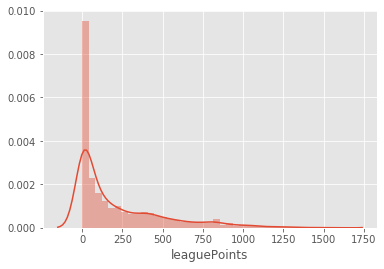

In [149]:
sns.distplot(df.leaguePoints)

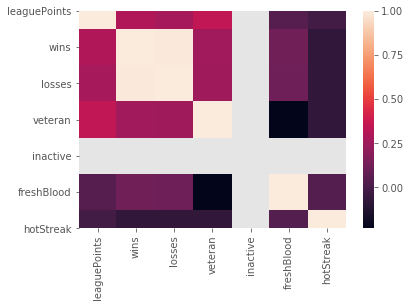

In [147]:
corr =df.corr()
sns.heatmap(corr)

In [153]:
match_info_df = pd.DataFrame()

In [164]:
match_url = "https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/7BbtuD4rXHUlsh5oqbjbQgJA1afjAeKdflAv9RrdaI9m" +'?api_key=' + api_key

In [165]:
r6 = requests.get(match_url)

In [166]:
r6

<Response [200]>

In [167]:
pd.DataFrame(r6.json()['matches'])

,platformId,gameId,champion,queue,season,timestamp,role,lane
0,KR,4023118028,76,420,13,1576224650953,NONE,JUNGLE
1,KR,4022941701,8,420,13,1576214726736,SOLO,TOP
2,KR,4022868284,54,420,13,1576213137516,SOLO,BOTTOM
3,KR,4022835458,64,420,13,1576205482764,DUO,NONE
4,KR,4021160362,127,420,13,1576130294152,SOLO,MID
...,...,...,...,...,...,...,...,...
95,KR,3760406867,222,450,13,1563534268580,DUO_SUPPORT,NONE
96,KR,3760168787,54,450,13,1563524960533,DUO_SUPPORT,NONE
97,KR,3760084758,99,450,13,1563519535596,DUO_SUPPORT,BOTTOM
98,KR,3760043470,7,420,13,1563519145098,DUO,NONE


In [168]:
match_info_df = pd.concat([match_info_df, pd.DataFrame(r6.json()['matches'])])

In [169]:
match_info_df

,platformId,gameId,champion,queue,season,timestamp,role,lane
0,KR,4023118028,76,420,13,1576224650953,NONE,JUNGLE
1,KR,4022941701,8,420,13,1576214726736,SOLO,TOP
2,KR,4022868284,54,420,13,1576213137516,SOLO,BOTTOM
3,KR,4022835458,64,420,13,1576205482764,DUO,NONE
4,KR,4021160362,127,420,13,1576130294152,SOLO,MID
...,...,...,...,...,...,...,...,...
95,KR,3760406867,222,450,13,1563534268580,DUO_SUPPORT,NONE
96,KR,3760168787,54,450,13,1563524960533,DUO_SUPPORT,NONE
97,KR,3760084758,99,450,13,1563519535596,DUO_SUPPORT,BOTTOM
98,KR,3760043470,7,420,13,1563519145098,DUO,NONE


In [262]:
match_info_df.to_csv('경기기록.csv', index = False, encoding = 'utf-8')

In [263]:
match_info_df = match_info_df.drop(columns='gameId')

In [264]:
match_info_df.head()

,platformId,champion,queue,season,timestamp,role,lane
0,KR,니달리,420,13,1.576200e+12,NONE,JUNGLE
1,KR,블라디미르,420,13,1.576200e+12,SOLO,TOP
2,KR,말파이트,420,13,1.576200e+12,SOLO,BOTTOM
3,KR,시비르,420,13,1.576200e+12,DUO,NONE
4,KR,아이번,420,13,1.576100e+12,SOLO,MID


In [259]:
match_info_df = pd.read_csv('매치.csv',engine= 'python')

In [261]:
match_info_df.head()

,platformId,gameId,champion,queue,season,timestamp,role,lane
0,KR,4023118028,니달리,420,13,1.576200e+12,NONE,JUNGLE
1,KR,4022941701,블라디미르,420,13,1.576200e+12,SOLO,TOP
2,KR,4022868284,말파이트,420,13,1.576200e+12,SOLO,BOTTOM
3,KR,4022835458,시비르,420,13,1.576200e+12,DUO,NONE
4,KR,4021160362,아이번,420,13,1.576100e+12,SOLO,MID


In [179]:
match_dupllicat_df = match_info_df.drop_duplicates('gameId')

In [181]:
match_dupllicat_df

,platformId,gameId,champion,queue,season,timestamp,role,lane
0,KR,4023118028,76,420,13,1576224650953,NONE,JUNGLE
1,KR,4022941701,8,420,13,1576214726736,SOLO,TOP
2,KR,4022868284,54,420,13,1576213137516,SOLO,BOTTOM
3,KR,4022835458,64,420,13,1576205482764,DUO,NONE
4,KR,4021160362,127,420,13,1576130294152,SOLO,MID
...,...,...,...,...,...,...,...,...
95,KR,3760406867,222,450,13,1563534268580,DUO_SUPPORT,NONE
96,KR,3760168787,54,450,13,1563524960533,DUO_SUPPORT,NONE
97,KR,3760084758,99,450,13,1563519535596,DUO_SUPPORT,BOTTOM
98,KR,3760043470,7,420,13,1563519145098,DUO,NONE


In [182]:
match_df = pd.DataFrame()

In [183]:
api_url = 'https://kr.api.riotgames.com/lol/match/v4/matches/' + str(match_dupllicat_df['gameId'].iloc[0]) + '?api_key=' + api_key

In [184]:
r7=requests.get(api_url)

In [186]:
r7= requests.get(api_url,headers = {'user-agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)'
                                                                            'Chrome/71.0.3578.98 Safari/537.36')})

In [187]:
r7

<Response [200]>

In [188]:
pd.DataFrame(list(r7.json().values()), index=list(r7.json().keys())).T

,gameId,platformId,gameCreation,gameDuration,queueId,mapId,seasonId,gameVersion,gameMode,gameType,teams,participants,participantIdentities
0,4023118028,KR,1576224650953,1778,420,11,13,9.24.300.6382,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."


In [189]:
match_df = pd.DataFrame()

In [194]:
from wordcloud import WordCloud

In [196]:
word = pd.read_csv('C:/Users/KOH/매치.csv',encoding='cp949')

In [205]:
word['champion'][0:100]

0       니달리
1     블라디미르
2      말파이트
3       시비르
4       아이번
      ...  
95      레넥톤
96     말파이트
97      레넥톤
98      르블랑
99      르블랑
Name: champion, Length: 100, dtype: object

In [216]:
count_df = list([list(x) for x in word['champion'].value_counts().reset_index().values])

In [218]:
count_df[0:100]

[['말파이트', 23],
 ['니달리', 12],
 ['블라디미르', 11],
 ['베인', 9],
 ['직스', 8],
 ['진', 7],
 ['잭스', 3],
 ['아트록스', 3],
 ['리신', 3],
 ['아이번', 3],
 ['카서스', 2],
 ['레넥톤', 2],
 ['르블랑', 2],
 ['블리츠크랭크', 2],
 ['시비르', 2],
 ['피즈', 2],
 ['이즈리얼', 2],
 ['쓰레쉬', 1],
 ['카직스', 1],
 ['카이사', 1],
 ['카사딘', 1]]

In [225]:
text = pd.read_csv('C:/Users/KOH/매치.csv',encoding='cp949')

,platformId,gameId,champion,queue,season,timestamp,role,lane
0,KR,4023118028,니달리,420,13,1.576200e+12,NONE,JUNGLE
1,KR,4022941701,블라디미르,420,13,1.576200e+12,SOLO,TOP
2,KR,4022868284,말파이트,420,13,1.576200e+12,SOLO,BOTTOM
3,KR,4022835458,시비르,420,13,1.576200e+12,DUO,NONE
4,KR,4021160362,아이번,420,13,1.576100e+12,SOLO,MID
...,...,...,...,...,...,...,...,...
95,KR,3760406867,레넥톤,450,13,1.563500e+12,DUO_SUPPORT,NONE
96,KR,3760168787,말파이트,450,13,1.563500e+12,DUO_SUPPORT,NONE
97,KR,3760084758,레넥톤,450,13,1.563500e+12,DUO_SUPPORT,BOTTOM
98,KR,3760043470,르블랑,420,13,1.563500e+12,DUO,NONE


In [229]:
file = open('C:/Users/KOH/매치.csv','r')

In [230]:
lists = file.readlines()

In [231]:
file.close()

In [232]:
lists

['platformId,gameId,champion,queue,season,timestamp,role,lane\n',
 'KR,4023118028,니달리,420,13,1.5762E+12,NONE,JUNGLE\n',
 'KR,4022941701,블라디미르,420,13,1.5762E+12,SOLO,TOP\n',
 'KR,4022868284,말파이트,420,13,1.5762E+12,SOLO,BOTTOM\n',
 'KR,4022835458,시비르,420,13,1.5762E+12,DUO,NONE\n',
 'KR,4021160362,아이번,420,13,1.5761E+12,SOLO,MID\n',
 'KR,4021085354,말파이트,420,13,1.5761E+12,DUO_SUPPORT,BOTTOM\n',
 'KR,4021110408,말파이트,420,13,1.5761E+12,DUO_SUPPORT,BOTTOM\n',
 'KR,4020981662,블라디미르,420,13,1.5761E+12,DUO_CARRY,BOTTOM\n',
 'KR,4019972714,니달리,420,13,1.5761E+12,SOLO,TOP\n',
 'KR,4019893447,말파이트,420,13,1.5761E+12,DUO_SUPPORT,NONE\n',
 'KR,4019792801,말파이트,420,13,1.5761E+12,DUO_SUPPORT,BOTTOM\n',
 'KR,4018176468,니달리,420,13,1.576E+12,NONE,JUNGLE\n',
 'KR,4017951974,아이번,420,13,1.576E+12,NONE,JUNGLE\n',
 'KR,4017793137,시비르,420,13,1.5759E+12,DUO_SUPPORT,BOTTOM\n',
 'KR,4016738195,베인,420,13,1.5759E+12,NONE,JUNGLE\n',
 'KR,4016507163,베인,420,13,1.5759E+12,NONE,JUNGLE\n',
 'KR,4002025766,니달리,450,13,1.5751E+12,D

In [233]:
twitter = Twitter()
morphs = []

for sentence in lists:
    morphs.append(twitter.pos(sentence))
    
print(morphs)

C:\Users\KOH\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('platformId', 'Alpha'), (',', 'Punctuation'), ('gameId', 'Alpha'), (',', 'Punctuation'), ('champion', 'Alpha'), (',', 'Punctuation'), ('queue', 'Alpha'), (',', 'Punctuation'), ('season', 'Alpha'), (',', 'Punctuation'), ('timestamp', 'Alpha'), (',', 'Punctuation'), ('role', 'Alpha'), (',', 'Punctuation'), ('lane', 'Alpha'), ('\n', 'Foreign')], [('KR', 'Alpha'), (',', 'Punctuation'), ('4023118028', 'Number'), (',', 'Punctuation'), ('니달리', 'Noun'), (',', 'Punctuation'), ('420', 'Number'), (',', 'Punctuation'), ('13', 'Number'), (',', 'Punctuation'), ('1.5762', 'Number'), ('E', 'Alpha'), ('+', 'Punctuation'), ('12', 'Number'), (',', 'Punctuation'), ('NONE', 'Alpha'), (',', 'Punctuation'), ('JUNGLE', 'Alpha'), ('\n', 'Foreign')], [('KR', 'Alpha'), (',', 'Punctuation'), ('4022941701', 'Number'), (',', 'Punctuation'), ('블라디미르', 'Noun'), (',', 'Punctuation'), ('420', 'Number'), (',', 'Punctuation'), ('13', 'Number'), (',', 'Punctuation'), ('1.5762', 'Number'), ('E', 'Alpha'), ('+', 'Punctua

In [243]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("뷁" not in word): 
            noun_adj_adv_list.append(word)
            
print(noun_adj_adv_list)


['니달리', '블라디미르', '말파이트', '시비르', '아이', '번', '말파이트', '말파이트', '블라디미르', '니달리', '말파이트', '말파이트', '니달리', '아이', '번', '시비르', '베인', '베인', '니달리', '말파이트', '블라디미르', '진', '진', '진', '말파이트', '리신', '리신', '말파이트', '말파이트', '니달리', '블라디미르', '직스', '잭스', '직스', '말파이트', '진', '베인', '베인', '진', '이즈리얼', '말파이트', '이즈리얼', '아트록스', '아이', '번', '아트록스', '말파이트', '니달리', '니달리', '블라디미르', '블라디미르', '니달리', '말파이트', '블라디미르', '니달리', '베인', '진', '직스', '직스', '말파이트', '말파이트', '니달리', '아트록스', '쓰레쉬', '블리츠크랭크', '블라디미르', '직스', '말파이트', '니달리', '니달리', '말파이트', '블라디미르', '카서스', '카직스', '카사딘', '카서스', '카이', '사', '말파이트', '직스', '잭스', '베인', '베인', '진', '베인', '직스', '말파이트', '말파이트', '블라디미르', '블리츠크랭크', '말파이트', '말파이트', '베인', '직스', '잭스', '리신', '피즈', '피즈', '블라디미르', '레넥톤', '말파이트', '레넥톤', '르블랑', '르블랑']


In [244]:
count = Counter(noun_adj_adv_list)

In [245]:
words = dict(count.most_common())

In [246]:
words

{'말파이트': 23,
 '니달리': 12,
 '블라디미르': 11,
 '베인': 9,
 '직스': 8,
 '진': 7,
 '아이': 3,
 '번': 3,
 '리신': 3,
 '잭스': 3,
 '아트록스': 3,
 '시비르': 2,
 '이즈리얼': 2,
 '블리츠크랭크': 2,
 '카서스': 2,
 '피즈': 2,
 '레넥톤': 2,
 '르블랑': 2,
 '쓰레쉬': 1,
 '카직스': 1,
 '카사딘': 1,
 '카이': 1,
 '사': 1}

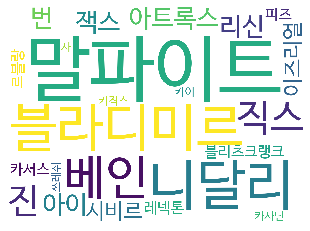

In [295]:
wordcloud = WordCloud(font_path='C:/Users/KOH/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic.ttf',background_color='white',width=1500, height = 1100).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()